In [3]:
from sklearn import linear_model as sklin
import sys; sys.path.append("/home/samarth/");
from heliosPy import l1
%matplotlib notebook

In [4]:
def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img

def smooth_sum(img):
    avg_img = ( img[ :-2 ,1:-1]  # top
     + img[2:   ,1:-1]  # bottom
     + img[1:-1 , :-2]  # left
     + img[1:-1 ,2:  ] )  # right
    return avg_img

def downsample(img, N):
    imgTemp = img.copy()
    for i in range(N):
        imgTemp = smooth(imgTemp)
    return imgTemp

def downsample_sum(img, N):
    imgTemp = img.copy()
    for i in range(N):
        imgTemp = smooth_sum(imgTemp)
    return imgTemp

def downsample_superpixel(img, N):
    imgTemp = img.copy()
    for i in range(N-1):
        img1 = ( imgTemp[0::2, :] + imgTemp[1::2, :] )/2.0
        img2 = ( img1[:, 0::2] + img1[:, 1::2] )/2.0
        imgTemp = img2.copy()
    return imgTemp


In [5]:
def gen_ill_cond(N):
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            A[i, j] = 1/(i + j + 1)
    return A

In [52]:
N = 20
#Ai = gen_ill_cond(N)
Ai = np.random.rand(N, 2*N)
x = np.zeros(2*N)
x[2] = 3; x[7] = 4; x[9] = -4; x[13] = 6; x[18] = 3.5
b = Ai.dot(x)

Ai_inv = np.linalg.pinv(Ai, rcond=1e-9)
x1 = Ai_inv.dot(b)



In [4]:
clf = sklin.Lasso(alpha=1e-4)
clf.fit(Ai, b)
x2 = clf.coef_
t2 = clf.intercept_

plt.figure()
plt.plot(x, 'r', alpha=0.5)
plt.plot(x1, '--g', alpha=0.5)
plt.plot(x2, '--b')
plt.show()
print(f" Diff = {(x - x1).sum()}")

NameError: name 'Ai' is not defined

In [6]:
np.linalg.cond(Ai)

20.978983711102362

In [6]:
path = "/scratch/samarth/HMIDATA/v720s_dConS/2018/residual"
Nmax = 50
artefact = np.zeros((4096, 4096))
for i in range(Nmax):
    a = fits.open(path + str(i).zfill(3) + ".fits", memmap=False)
    image = a[0].data
    artefact += image
    a.close()
artefact /= Nmax

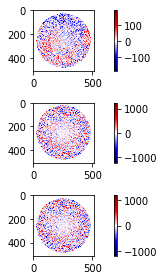

In [8]:
artefactDS = downsample_superpixel(artefact, 4)
imageDS = downsample_superpixel(image, 4)
plt.figure()
plt.subplot(311)
im = plt.imshow(artefactDS[:, ::-1], cmap='seismic')
plt.colorbar(im)

plt.subplot(312)
im = plt.imshow(imageDS[:, ::-1], cmap='seismic')
plt.colorbar(im)

plt.subplot(313)
im = plt.imshow(imageDS[:, ::-1] - artefactDS[:, ::-1], cmap='seismic')
plt.colorbar(im)

plt.tight_layout()
plt.show()

In [7]:
def get_fit_coefs(data, breaks, deg):
    pfit = np.zeros((breaks.shape[0]-1, deg+1))
    for i in range(breaks.shape[0]-1):
        pieceMin = breaks[i]
        pieceMax = breaks[i+1]
        xdata = data[pieceMin:pieceMax, 0]
        ydata = data[pieceMin:pieceMax, 1]
        z = np.polyfit(xdata, ydata/np.sqrt(xdata), deg, full=True)
        pfit[i, :] = z[0]
        print(f"LS error for fit (for piece = {i}): {z[1]}")
    return pfit

def get_fit_poly(data, breaks, pfit):
    polyList = []
    xList = []
    for i in range(pfit.shape[0]):
        p = np.poly1d(pfit[i, :])
        x = np.linspace(data[breaks[i], 0], data[breaks[i+1], 0], 1000)
        newu = p(x)
        polyList.append(newu)
        xList.append(x)
    return xList, polyList
    

In [8]:
ulm = np.loadtxt("green.csv", delimiter=",")
vlm = np.loadtxt("red.csv", delimiter=",")
wlm = np.loadtxt("blue.csv", delimiter=",")
totlm = np.loadtxt("black.csv", delimiter=",")

plt.figure()
plt.plot(ulm[:, 0], ulm[:, 1], 'g')
plt.plot(vlm[:, 0], vlm[:, 1], 'r')
plt.plot(wlm[:, 0], wlm[:, 1], 'b')
plt.plot(totlm[:, 0], totlm[:, 1], 'black')
plt.show()


<IPython.core.display.Javascript object>

In [9]:
def piecewise(pieces, Nmax):
    totInt = pieces.shape[0] - 1
    for i in range(totInt):
        pieceMin, pieceMax = pieces[i], pieces[i+1]
        z = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), 7)


pieceMin, pieceMax = 0, 30#, ulm.shape[0]-1
z = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), 4)
z4 = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), 4)
z5 = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), 5)
z6 = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), 6)
z7 = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), 7)
ztemp = get_fit_coefs(ulm, np.array([0, 30, ulm.shape[0]-1]), 5)
xtemp, ptemp = get_fit_poly(np.array([0, 30, ulm.shape[0]-1]), ztemp)
z = ztemp[0, :]
p = np.poly1d(z)
x = np.linspace(ulm[pieceMin, 0], ulm[pieceMax, 0], 1000)
newu = p(x)
plt.figure()
for i in range(len(xtemp)):
    plt.loglog(xtemp[i], ptemp[i], 'b')
plt.loglog(ulm[:, 0], ulm[:, 1]/np.sqrt(ulm[:, 0]), '--r', alpha = 0.4)
plt.show()

LS error for fit (for piece = 0): [0.00605517]
LS error for fit (for piece = 1): [0.14997865]


TypeError: get_fit_poly() missing 1 required positional argument: 'pfit'

LS error for fit (for piece = 0): [0.34537598]
LS error for fit (for piece = 1): [0.96386346]


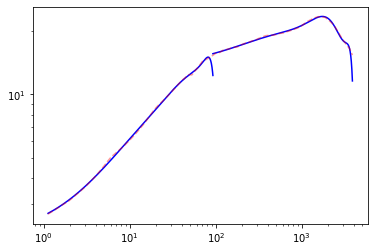

In [89]:
data = wlm.copy()
ztemp = get_fit_coefs(data, np.array([0, 47, data.shape[0]-1]), 6)
xtemp, ptemp = get_fit_poly(data, np.array([0, 47, data.shape[0]-1]), ztemp)
plt.figure()
for i in range(len(xtemp)):
    plt.loglog(xtemp[i], ptemp[i], 'b')
plt.loglog(data[:, 0], data[:, 1]/np.sqrt(data[:, 0]), '--r', alpha = 0.4)
plt.show()

LS error for fit (for piece = 0): [0.00943117]
LS error for fit (for piece = 1): [0.10421045]


/home/samarth/dopplervel2/get_synthetic_spectra.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


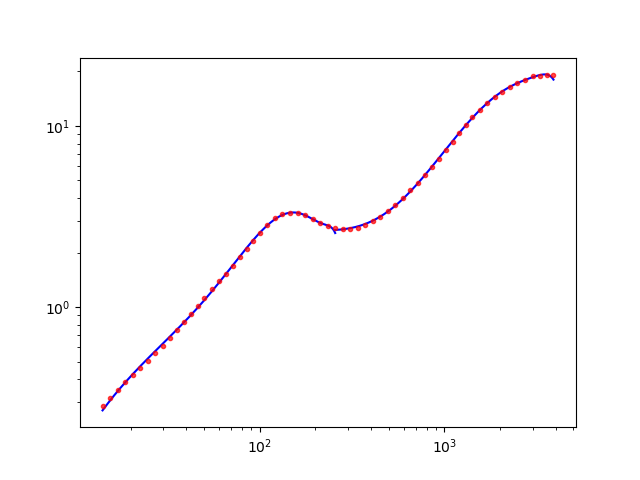

LS error for fit (for piece = 0): [4.68541716]
LS error for fit (for piece = 1): [4.90844464]


/home/samarth/dopplervel2/get_synthetic_spectra.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


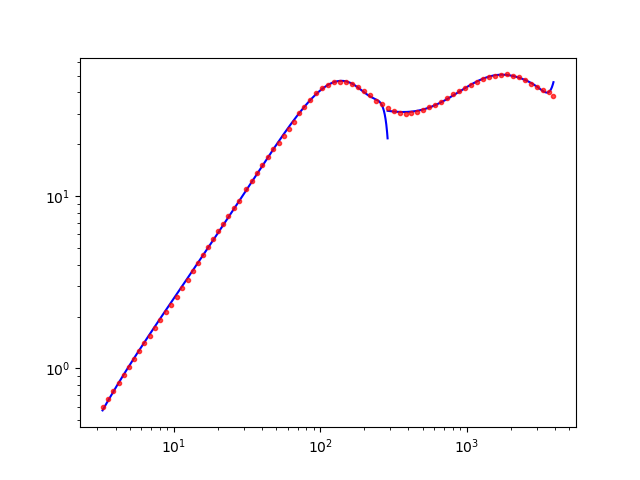

LS error for fit (for piece = 0): [0.34537598]
LS error for fit (for piece = 1): [0.96386346]


/home/samarth/dopplervel2/get_synthetic_spectra.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


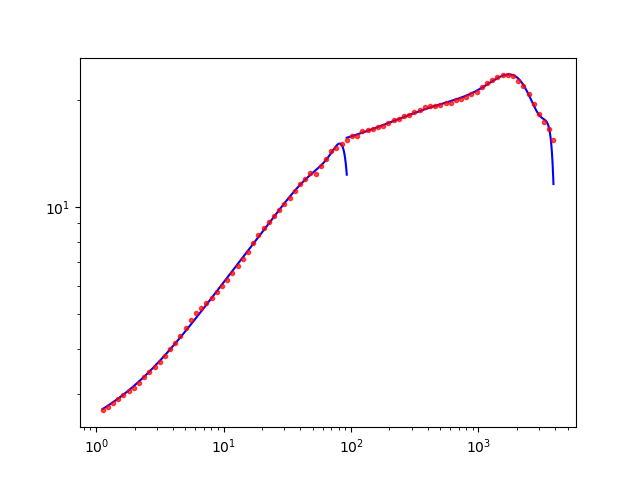

In [35]:
%run get_synthetic_spectra.py --hpc --u --deg 6 
%run get_synthetic_spectra.py --hpc --v --deg 6
%run get_synthetic_spectra.py --hpc --w --deg 6

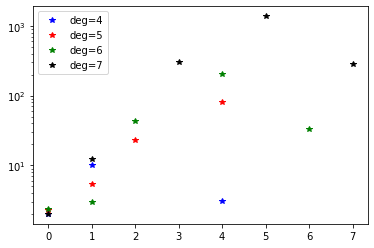

In [53]:
lmax = ulm[pieceMin:pieceMax, 0].max()
deglen = z7.shape[0]
ellscale = [lmax**i for i in range(deglen)]
plt.figure()
plt.semilogy(z4[::-1]*ellscale[:5], '*b', label='deg=4')
plt.semilogy(z5[::-1]*ellscale[:6], '*r', label='deg=5')
plt.semilogy(z6[::-1]*ellscale[:7], '*g', label='deg=6')
plt.semilogy(z7[::-1]*ellscale, '*', color='black', label='deg=7')
plt.legend()
plt.show()

In [16]:
pieceMin, pieceMax = 0, 30#ulm.shape[0]-1
for deg in range(15):
    a = np.polyfit(ulm[pieceMin:pieceMax, 0], ulm[pieceMin:pieceMax, 1]/np.sqrt(ulm[pieceMin:pieceMax, 0]), deg, full=True)
    print(f"deg = {deg}, residual = {a[1]}")

deg = 0, residual = [34.47282782]
deg = 1, residual = [2.51552055]
deg = 2, residual = [0.66234655]
deg = 3, residual = [0.05617081]
deg = 4, residual = [0.03906359]
deg = 5, residual = [0.00605517]
deg = 6, residual = [0.00577358]
deg = 7, residual = [0.00200627]
deg = 8, residual = [0.00133012]
deg = 9, residual = [0.00023836]
deg = 10, residual = [0.00023665]
deg = 11, residual = [0.00022537]
deg = 12, residual = [0.0001975]
deg = 13, residual = [8.06779911e-05]
deg = 14, residual = [7.61336411e-05]


In [150]:
from scipy.optimize import curve_fit
pieceMin, pieceMax = 30, ulm.shape[0]-1
N = 10
def func(x, a):
    summ = np.zeros_like(x)
    for i in range(N):
        summ += a[i] * x**i
    return summ
xdata = ulm[pieceMin:pieceMax, 0]
ydata = ulm[pieceMin:pieceMax, 1]/np.sqrt(xdata * (2*xdata + 1))
popt, pcov = curve_fit(func, xdata, ydata)

plt.figure()
plt.loglog(xdata, func(xdata, *popt), 'r-', label=f'a:{a}')
plt.loglog(xdata, ydata, 'g--', label='actual')
plt.legend()
plt.show()

IndexError: invalid index to scalar variable.

In [39]:
from cvxopt import normal
m, n = 500, 100
P, q = normal(m,n), normal(m,1)
u = l1.l1(P, q)

     pcost       dcost       gap    pres   dres   k/t
 0:  3.8527e+02  1.1631e+02  3e+02  8e-17  3e-15  1e+00
 1:  3.9150e+02  2.2678e+02  2e+02  4e-16  1e-14  5e-01
 2:  3.8383e+02  2.8852e+02  1e+02  4e-16  1e-14  2e-01
 3:  3.4456e+02  3.1994e+02  2e+01  4e-16  6e-15  4e-02
 4:  3.3584e+02  3.2608e+02  1e+01  5e-16  7e-15  1e-02
 5:  3.3213e+02  3.2860e+02  4e+00  4e-16  1e-14  5e-03
 6:  3.3096e+02  3.2938e+02  2e+00  5e-16  1e-14  2e-03
 7:  3.3032e+02  3.2981e+02  5e-01  8e-16  1e-14  6e-04
 8:  3.3010e+02  3.2996e+02  1e-01  5e-16  3e-14  2e-04
 9:  3.3003e+02  3.3001e+02  2e-02  4e-16  2e-14  3e-05
10:  3.3002e+02  3.3001e+02  1e-02  4e-16  5e-13  1e-05
11:  3.3002e+02  3.3002e+02  9e-04  4e-16  6e-14  9e-07
12:  3.3002e+02  3.3002e+02  1e-05  5e-16  5e-13  1e-08
Optimal solution found.


<IPython.core.display.Javascript object>


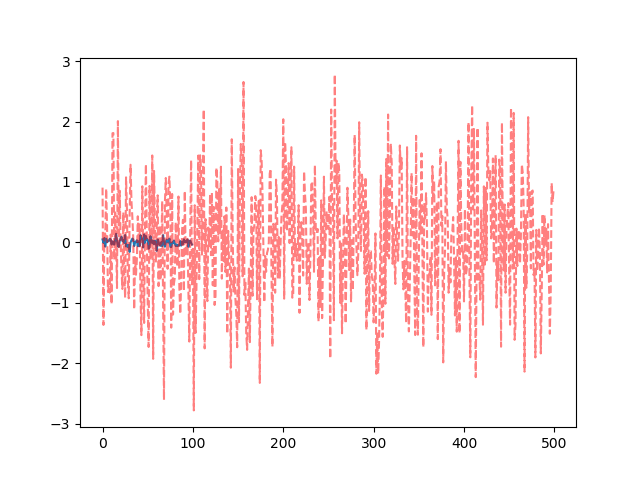

In [40]:
plt.figure()
plt.plot(u)
plt.plot(q, '--r', alpha=0.5)
plt.show()